<a href="https://colab.research.google.com/github/pmvdafonseca/sampling_theorem/blob/main/Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
# Função criada para gerar os dados de entrada em diversas frequências de amostragem. 
# t contém um array com os instantes de amostragem
def x(t):
  return 3.0*np.cos(4000.0*np.pi*t) + 5.0*np.sin(12000.0*np.pi*t) + 10.0*np.cos(24000.0*np.pi*t)  

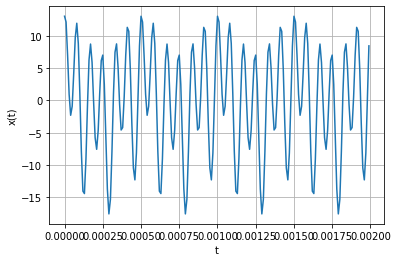

In [ ]:
fs_visualizacao = 100000  # Uma frequência de amostragem absurdamente alta (para essa aplicação). 
                          # Utilizada apenas para visualização do sinal.
T = 200/fs_visualizacao  # 200 amostras de sinal na frequencia de amostragem para visualizacao
t_visualizacao = np.arange(0, T, 1/fs_visualizacao)
x_visualizacao = x(t_visualizacao)

fig = plt.figure()

plt.plot(t_visualizacao,x_visualizacao)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid('both')

plt.show()

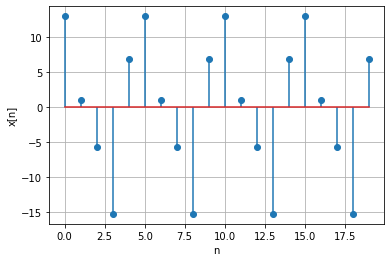

In [ ]:
fs = 10000                 # Frequência de amostragem fornecida pelo problema. 
                          # Note que ela é inferior à frequência de Nyquist.
t_amostrado = t = np.arange(0, T, 1/fs)
x_amostrado = x(t_amostrado)

fig = plt.figure()

plt.stem(x_amostrado,use_line_collection=True)

plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid('both')

plt.show()

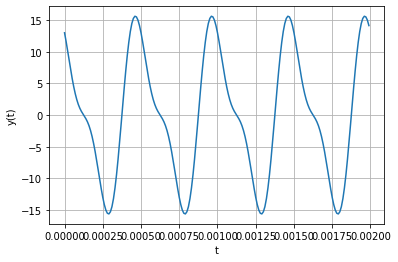

In [ ]:
x_recuperado = signal.resample(x_amostrado,len(t_visualizacao))  # Reconstrução do sinal simulada por meio de um processo de reamostragem em uma frequência de amostragem elevada.

fig = plt.figure()

plt.plot(t_visualizacao, x_recuperado)

#plt.stem(t_amostrado,x_amostrado,'r',use_line_collection=True)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid('both')

plt.show()

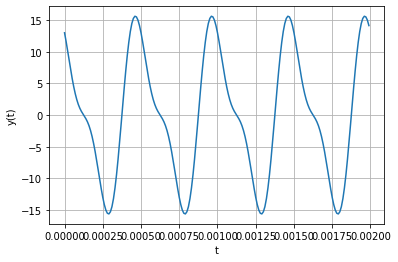

In [ ]:
# Sinal reconstruído determinado teoricamente

y = 13.0*np.cos(4000.0*np.pi*t_visualizacao) - 5.0*np.sin(8000.0*np.pi*t_visualizacao)

fig = plt.figure()

plt.plot(t_visualizacao, y)

#plt.stem(t_amostrado,x_amostrado,'r',use_line_collection=True)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid('both')

plt.show()

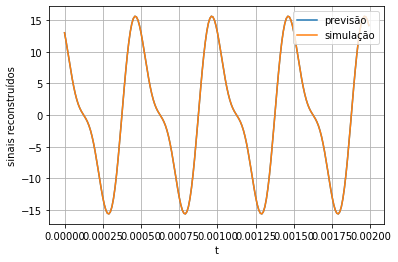

In [ ]:
# Comparação entre os sinais determinados teoricamente e do processo de simulação
fig = plt.figure()

plt.plot(t_visualizacao, y, label='previsão')
plt.plot(t_visualizacao, x_recuperado, label='simulação')


plt.xlabel('t')
plt.ylabel('sinais reconstruídos')
plt.grid('both')
plt.legend()

plt.show()